# This Notebook is made for studying one question: can we evaluate the probability that among a group of people, at least two of them are in the same place at the same time 

First: N is the parameter for the number of places considered in the city

In [ ]:
N=[25,50,100,200,500,1000]
#k=33

Classical import

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## This part correspond to a simple probabilistic analysis
Considering N and k people in the group G places in a city, under the assumptions:
- We suppose a simple relation between the number of the group and the number of people that are outside in one of those N places today, we have: $\tilde{K}=\alpha K$ and can assume $\tilde{K}=K$ in the notation for simplification
- We suppose each individuals select randomnly and independently one place among N.

we can express the probability of the variable Y -> the choice of one place among N of the people among k. We can see that under those assumptions, $Y-> B(k,\frac{1}{N})$
Particularly, we have:

$$ P(Y \geq 2) = \frac{(N-1)^{k-1} \cdot (n-1-k)}{N^k} $$

In [ ]:
k=np.arange(10,200,10)
up=[]
for n in N:
    Eq=[]
    for j in k:
        j=int(j)
        u=1-((n-1)**(j-1))*(n-1+j)/(n**j)
        Eq.append(u)
    up.append(Eq)
print(Eq)

## We can now plot different simulation, depending on k places in the city and N people in the group
For example, we can see that we reach 40% of chance to see at least one other person of G in the place we choose at the moment when there is only 100 places considered and 130 people in G (or $\tilde{G}$)

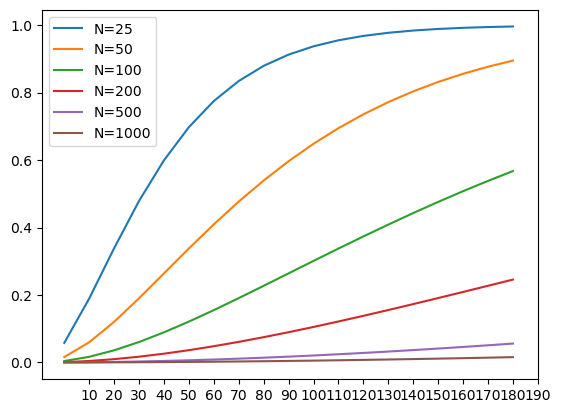

In [ ]:


plt.figure()
plt.plot(up[0],label=f'N={N[0]}')
plt.plot(up[1],label=f'N={N[1]}')
plt.plot(up[2],label=f'N={N[2]}')
plt.plot(up[3],label=f'N={N[3]}')
plt.plot(up[4],label=f'N={N[4]}')
plt.plot(up[5], label=f'N={N[5]}')
plt.xticks(k//10, labels=[str(val) for val in k])  # Convert k values to string labels
#plt.xticks(k)  # Change x-tick labels
plt.legend()
plt.show()

# And now....let's do real science...
## The previous part was considering the assumption very easy that each places is selected randomly and I.I.D. Now, we will suppose two things:
- People now each others, there is a social network behind the group G, and each one can influence locally where he will go
- We can think of a M message passing throught the network as a message exchange to convince people of the network to go in a specific $k_{i}$ instead of $k_{j}$ 

new imports

In [ ]:
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [ ]:
COLOR = '#40a6d1'

## The next part is creating a Barabasi-A [...] ? graph to start with a network above the groupe of people G

In [ ]:
def k_distrib(graph, scale='lin', colour='#40a6d1', alpha=.8, fit_line=False, expct_lo=1, expct_hi=10, expct_const=1):
    
    plt.close()
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    
    # Calculate the maximum degree to know the range of x-axis
    for n in graph.nodes():
        if graph.degree(n) > max_degree:
            max_degree = graph.degree(n)
    
    # X-axis and y-axis values
    x = []
    y_tmp = []
    
    # Loop over all degrees until the maximum to compute the portion of nodes for that degree
    for i in range(max_degree + 1):
        x.append(i)
        y_tmp.append(0)
        for n in graph.nodes():
            if graph.degree(n) == i:
                y_tmp[i] += 1
        y = [i / num_nodes for i in y_tmp] 
    
    # Check for the lin / log parameter and set axes scale
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.title('Degree distribution (log-log scale)')
        plt.ylabel('log(P(k))')
        plt.xlabel('log(k)')
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        
        if fit_line:
            # Add theoretical distribution line k^-3
            # Note that you need to parametrize it manually
            w = [a for a in range(expct_lo,expct_hi)]
            z = []
            for i in w:
                x = (i**-3) * expct_const # set line's length and fit intercept
                z.append(x)

            plt.plot(w, z, 'k-', color='#7f7f7f')
    else:
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        plt.title('Degree distribution (linear scale)')
        plt.ylabel('P(k)')
        plt.xlabel('k')

    plt.show()

In [ ]:
def rand_prob_node():
    nodes_probs = []
    for node in G.nodes():
        node_degr = G.degree(node)
        #print(node_degr)
        node_proba = node_degr / (2 * len(G.edges()))
        #print("Node proba is: {}".format(node_proba))
        nodes_probs.append(node_proba)
        #print("Nodes probablities: {}".format(nodes_probs))
    random_proba_node = np.random.choice(G.nodes(),p=nodes_probs)
    #print("Randomly selected node is: {}".format(random_proba_node))
    return random_proba_node

def add_edge():
        if len(G.edges()) == 0:
            random_proba_node = 0
        else:
            random_proba_node = rand_prob_node()
        new_edge = (random_proba_node, new_node)
        if new_edge in G.edges():
            add_edge()
        else:
            G.add_edge(new_node, random_proba_node)
            print("Edge added: {} {}".format(new_node + 1, random_proba_node))

In [ ]:

# Get parameters
init_nodes = 12 #int(input("Please type in the initial number of nodes (m_0): "))
final_nodes = 250 #int(input("\nPlease type in the final number of nodes: "))
m_parameter = 7 #int(input("\nPlease type in the value of m parameter (m<=m_0): "))

print("\n")
print("Creating initial graph...")

G = nx.complete_graph(init_nodes)

print("Graph created. Number of nodes: {}".format(len(G.nodes())))
print("Adding nodes...")

count = 0
new_node = init_nodes

for f in range(final_nodes - init_nodes):
    print("----------> Step {} <----------".format(count))
    G.add_node(init_nodes + count)
    print("Node added: {}".format(init_nodes + count + 1))
    count += 1
    for e in range(0, m_parameter):
        add_edge()
    new_node += 1


print("\nFinal number of nodes ({}) reached".format(len(G.nodes())))



Creating initial graph...
Graph created. Number of nodes: 12
Adding nodes...
----------> Step 0 <----------
Node added: 13
Edge added: 13 11
Edge added: 13 5
Edge added: 13 6
Edge added: 13 1
Edge added: 13 4
Edge added: 13 0
Edge added: 13 2
----------> Step 1 <----------
Node added: 14
Edge added: 14 9
Edge added: 14 0
Edge added: 14 10
Edge added: 14 3
Edge added: 14 7
Edge added: 14 5
Edge added: 14 13
----------> Step 2 <----------
Node added: 15
Edge added: 15 11
Edge added: 15 9
Edge added: 15 10
Edge added: 15 5
Edge added: 15 2
Edge added: 15 12
Edge added: 15 6
----------> Step 3 <----------
Node added: 16
Edge added: 16 4
Edge added: 16 5
Edge added: 16 9
Edge added: 16 15
Edge added: 16 8
Edge added: 16 14
Edge added: 16 12
----------> Step 4 <----------
Node added: 17
Edge added: 17 9
Edge added: 17 3
Edge added: 17 10
Edge added: 17 1
Edge added: 17 7
Edge added: 17 11
Edge added: 17 6
----------> Step 5 <----------
Node added: 18
Edge added: 18 14
Edge added: 18 8
Edge

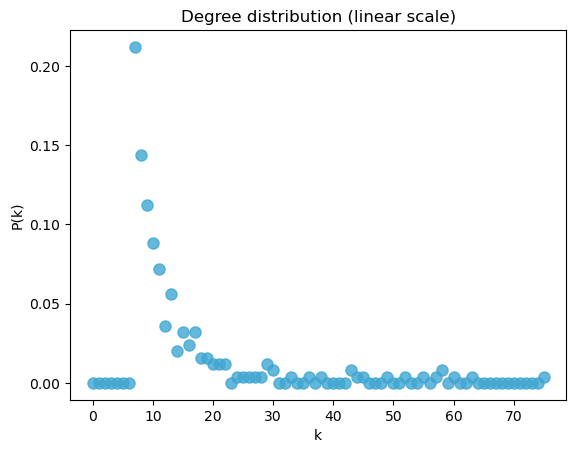

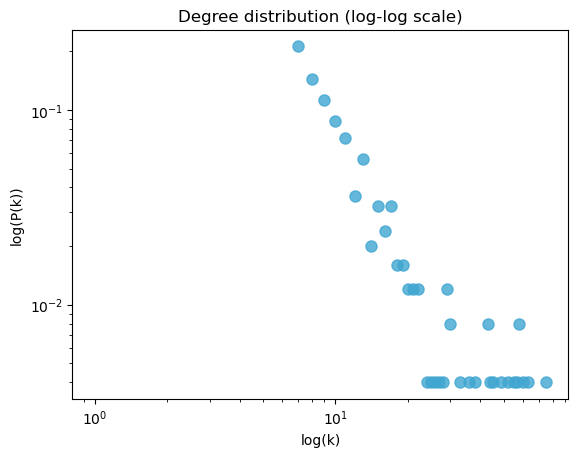

(None, None)

In [ ]:
k_distrib(G), k_distrib(G, scale = 'log', fit_line = False)

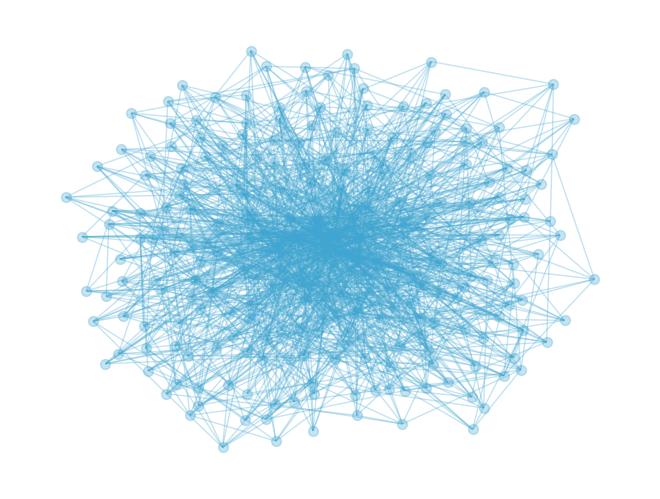

In [ ]:
nx.draw(G, alpha = .3, edge_color = COLOR, node_color = COLOR, node_size=50)

In [ ]:
adj_matrix = nx.to_numpy_array(G)

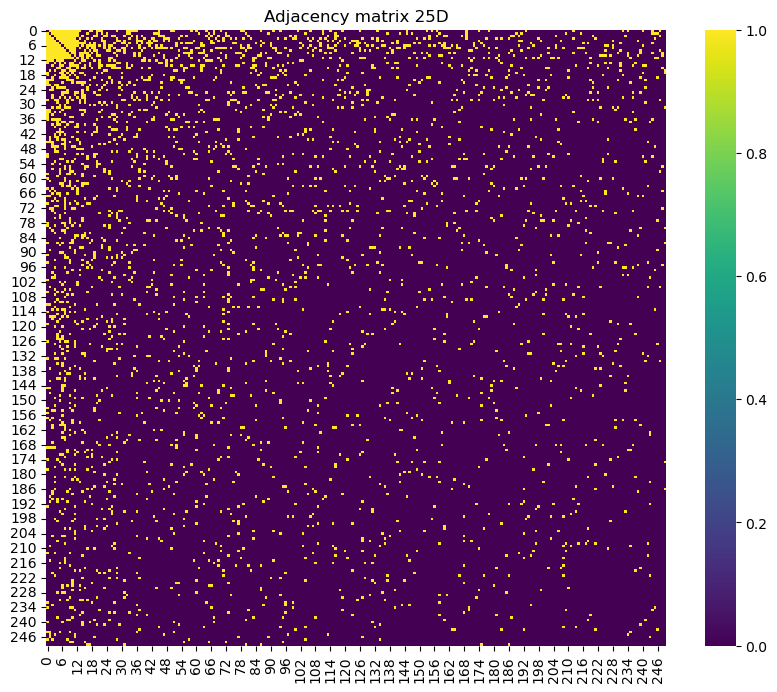

In [ ]:
import seaborn as sns
downsampled_data = adj_matrix[::1, ::1]  # we can downsample if we prefer

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(downsampled_data, cmap='viridis')
plt.title('Adjacency matrix 25D')
plt.show()